In [1]:
import json
words_list_file_path = r"C:\Users\ACER\Desktop\wlasl\hospital.json"
with open(words_list_file_path) as f:
    words_list = json.load(f)
print(len(words_list))

62


In [14]:
import os
import shutil

source_dir = r"C:\Users\User\Desktop\project\hos\test"
target_dir = r"C:\Users\User\Desktop\project\hos"

# Walk through all directories and subdirectories in the source directory
for root, dirs, files in os.walk(source_dir):
    for file in files:
        if file.endswith(".mp4"):
            # Construct the source file path
            source_file_path = os.path.join(root, file)
            
            # Construct the target file path
            target_file_path = os.path.join(target_dir, file)
            
            # Move the file to the target directory
            shutil.move(source_file_path, target_file_path)
source_dir = r"C:\Users\User\Desktop\project\hos\val"
target_dir = r"C:\Users\User\Desktop\project\hos"

# Walk through all directories and subdirectories in the source directory
for root, dirs, files in os.walk(source_dir):
    for file in files:
        if file.endswith(".mp4"):
            # Construct the source file path
            source_file_path = os.path.join(root, file)
            
            # Construct the target file path
            target_file_path = os.path.join(target_dir, file)
            
            # Move the file to the target directory
            shutil.move(source_file_path, target_file_path)
source_dir = r"C:\Users\User\Desktop\project\hos\train"
target_dir = r"C:\Users\User\Desktop\project\hos"

# Walk through all directories and subdirectories in the source directory
for root, dirs, files in os.walk(source_dir):
    for file in files:
        if file.endswith(".mp4"):
            # Construct the source file path
            source_file_path = os.path.join(root, file)
            
            # Construct the target file path
            target_file_path = os.path.join(target_dir, file)
            
            # Move the file to the target directory
            shutil.move(source_file_path, target_file_path)

In [15]:
import tqdm
import random
import pathlib
import itertools
import collections

import os
import cv2
import einops
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import time
import imageio
from IPython import display
from urllib import request

os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [16]:
def get_class(fname):
  """ Retrieve the name of the class given a filename.

    Args:
      fname: Name of the file in the UCF101 dataset.

    Returns:
      Class that the file belongs to.
  """
  return fname.split('_')[0]
def get_position(fname):
  """ Retrieve the name of the class given a filename.

    Args:
      fname: Name of the file in the UCF101 dataset.

    Returns:
      Class that the file belongs to.
  """
  try:
      return fname.split('_')[1]
  except:
      return "nope"
def get_files_per_class(files):
    """ Retrieve the files that belong to each class.

    Args:
      files: List of files in the dataset.

    Returns:
      Dictionary of class names (key) and files (values). 
    """
    files_for_class = collections.defaultdict(list)
    for fname in files:
        class_name = get_class(fname)
        files_for_class[class_name].append(fname)
    return files_for_class
def select_subset_of_classes(files_for_class, classes, files_per_class):
  """ Create a dictionary with the class name and a subset of the files in that class.

    Args:
      files_for_class: Dictionary of class names (key) and files (values).
      classes: List of classes.
      files_per_class: Number of files per class of interest.

    Returns:
      Dictionary with class as key and list of specified number of video files in that class.
  """
  files_subset = dict()

  for class_name in classes:
    class_files = files_for_class[class_name]
    files_subset[class_name] = class_files[:files_per_class]

  return files_subset
def download_from_zip(source_dir, to_dir, file_names):
    """ Download the contents of the zip file from the zip URL.

    Args:
      zip_url: A URL with a zip file containing data.
      to_dir: A directory to download data to.
      file_names: Names of files to download.
    """
    for fn in tqdm.tqdm(file_names):
        class_name = get_class(fn)
        source_file = source_dir / fn
        output_dir = to_dir / class_name
        output_file = to_dir / class_name / fn
        os.makedirs(output_dir, exist_ok=True)
        source_file.rename(output_file)
def split_class_lists(files_for_class, count):
  """ Returns the list of files belonging to a subset of data as well as the remainder of
    files that need to be downloaded.
    
    Args:
      files_for_class: Files belonging to a particular class of data.
      count: Number of files to download.

    Returns:
      Files belonging to the subset of data and dictionary of the remainder of files that need to be downloaded.
  """
  split_files = []
  remainder = {}
  for cls in files_for_class:
    split_files.extend(files_for_class[cls][:count])
    remainder[cls] = files_for_class[cls][count:]
  return split_files, remainder
def download_ucf_100_subset(num_classes, splits, download_dir):
  """ Download a subset of the UCF101 dataset and split them into various parts, such as
    training, validation, and test.

    Args:
      zip_url: A URL with a ZIP file with the data.
      num_classes: Number of labels.
      splits: Dictionary specifying the training, validation, test, etc. (key) division of data 
              (value is number of files per split).
      download_dir: Directory to download data to.

    Return:
      Mapping of the directories containing the subsections of data.
  """
  files = os.listdir(r"C:\Users\User\Desktop\project\hos")
  
  files_for_class = get_files_per_class(files)

  classes = list(files_for_class.keys())[:num_classes]

  for cls in classes:
    random.shuffle(files_for_class[cls])
    
  # Only use the number of classes you want in the dictionary
  files_for_class = {x: files_for_class[x] for x in classes}

  dirs = {}
  for split_name, split_count in splits.items():
    print(split_name, ":")
    split_dir = download_dir / split_name
    split_files, files_for_class = split_class_lists(files_for_class, split_count)
    download_from_zip(download_dir, split_dir, split_files)
    dirs[split_name] = split_dir

  return dirs

In [17]:
NUM_CLASSES = 20
FILES_PER_CLASS = 20
download_dir = pathlib.Path(r'C:\Users\User\Desktop\project\hos')
subset_paths = download_ucf_100_subset(num_classes = NUM_CLASSES,
                                       splits = {"train": 14, "val": 3, "test": 3},
                                       download_dir = download_dir)

train :


100%|██████████| 280/280 [00:00<00:00, 3087.18it/s]


val :


100%|██████████| 60/60 [00:00<00:00, 2736.31it/s]


test :


100%|██████████| 60/60 [00:00<00:00, 2736.37it/s]


In [18]:
video_count_train = len(list(download_dir.glob('train/*/*.mp4')))
video_count_val = len(list(download_dir.glob('val/*/*.mp4')))
video_count_test = len(list(download_dir.glob('test/*/*.mp4')))
video_total = video_count_train + video_count_val + video_count_test
print(f"Total videos: {video_total}")

Total videos: 400


In [19]:
import os
import math
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_video
from torchvision.transforms import Compose, Lambda, Resize
from torchvision.transforms._transforms_video import CenterCropVideo
from torchvision.transforms.functional import pad
import threading
from queue import Queue

In [20]:
# Define the normalize function at the top level
def normalize(x):
    return x / 255.0

class VideoDataset(Dataset):
    def __init__(self, directory, transform=None, frames_per_clip=15, resize_dims=(224, 224)):
        self.directory = directory
        self.transform = transform
        self.frames_per_clip = frames_per_clip
        self.resize_dims = resize_dims
        self.classes = sorted(os.listdir(directory))  # Assuming each class has its own directory
        self.files = []
        for class_index, _class in enumerate(self.classes):
            class_dir = os.path.join(directory, _class)
            self.files += [(os.path.join(class_dir, f), class_index) for f in os.listdir(class_dir)]

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        try:
            file_path, class_index = self.files[idx]
            video, _, info = read_video(file_path, pts_unit='sec')
            total_frames = video.shape[0]

            # Adjust the frame dimension for interpolation
            video = video.permute(0, 3, 1, 2)  # Change to [frames, channels, height, width]

            # Resize frames to a uniform size
            resized_video = torch.nn.functional.interpolate(video, size=self.resize_dims, mode='bilinear', align_corners=False)

            frame_indices = torch.arange(0, total_frames, 10)

            video = resized_video[frame_indices]

            if video.size(0) > self.frames_per_clip:
                # If more frames than needed, trim the video to keep only the required frames
                video = video[:self.frames_per_clip]

            elif video.size(0) < self.frames_per_clip:
                # If fewer frames than needed, fill the end with black frames
                num_missing_frames = self.frames_per_clip - video.size(0)
                black_frames = torch.zeros(num_missing_frames, *video.shape[1:], dtype=video.dtype, device=video.device)
                video = torch.cat((video, black_frames), dim=0)

            video = video.permute(1, 0, 2, 3)  # Change back to [frames, height, width, channels]

            if self.transform:
                # Ensure your transform can handle batched frames correctly
                video = self.transform(video)

            return video, class_index
        except Exception as e:
            print(f"Error loading data at index {idx}: {e}")
            return None

In [21]:
transform = Compose([
    Lambda(normalize),  # Normalize to [0,1]
])

# Initialize datasets
train_dataset = VideoDataset(subset_paths['train'], transform=transform)
val_dataset = VideoDataset(subset_paths['val'], transform=transform)
test_dataset = VideoDataset(subset_paths['test'], transform=transform)

# DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False, num_workers=0)

# batch_size = 4  # Adjust batch size as needed
# num_threads = 2  # Adjust number of threads as needed
# train_loader = CustomDataLoader(train_dataset, batch_size=batch_size, num_threads=num_threads)
# val_loader = CustomDataLoader(val_dataset, batch_size=batch_size, num_threads=num_threads)
# test_loader = CustomDataLoader(test_dataset, batch_size=batch_size, num_threads=num_threads)

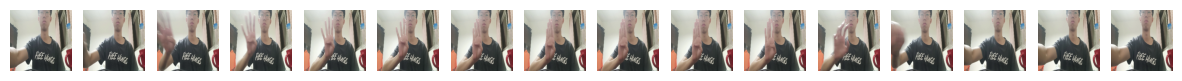

In [33]:
import torch
import matplotlib.pyplot as plt
from torchvision.io import read_video
from torch.utils.data import Dataset
import os

# Your existing dataset class and normalize function seems fine for this purpose

# Function to plot a single video
def plot_video(video_tensor):
    """
    Plots frames from a video tensor.
    Assumes video_tensor is in shape [channels, frames, height, width]
    and the pixel values are normalized between 0 and 1.
    """
    fig, axs = plt.subplots(nrows=1, ncols=video_tensor.shape[1], figsize=(15, 5))
    for i, frame in enumerate(video_tensor.permute(1, 0, 2, 3)):  # permute frames to the front
        axs[i].imshow(frame.permute(1, 2, 0))  # permute to [height, width, channels]
        axs[i].axis('off')
    plt.show()

# Example of how to visualize a video from the train dataset
def show_sample(dataset):
    # Fetch a sample from the dataset
    video, _ = dataset[77]  # Change 0 to another index to see different samples
    # Assuming the video is already in the right shape and normalized
    plot_video(video)

# Assuming you have initialized train_dataset somewhere as shown previously
show_sample(train_dataset)


In [22]:
import torch
import torch.nn as nn
from torchvision import models
from mobilenetv2 import MobileNetV2

# Initialize the MobileNetV2 model
# Make sure the model architecture parameters match those of the pretrained model
model = MobileNetV2(num_classes=27)

state_dict = torch.load('jester_mobilenetv2_1.0x_RGB_16_best.pth')

new_state_dict = {}
for key, value in state_dict['state_dict'].items():
    if key.startswith('module.'):
        new_key = key[7:]  # Remove 'module.' prefix
        new_state_dict[new_key] = value
    else:
        new_state_dict[key] = value

# Load the state dictionary into the model
model.load_state_dict(new_state_dict)

for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Sequential(
    nn.Linear(1280, 2048),
    nn.ReLU(),
    nn.BatchNorm1d(2048),
    nn.Dropout(0.2),
    nn.Linear(2048, 4096),
    nn.ReLU(),
    nn.BatchNorm1d(4096),
    nn.Dropout(0.2),
    nn.Linear(4096, 8192),
    nn.ReLU(),
    nn.BatchNorm1d(8192),
    nn.Dropout(0.2),
    nn.Linear(8192, 20),
)

In [10]:
from torchsummary import summary
input_size = (3, 50, 224, 224)

summary(model.cuda(), input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1     [-1, 32, 50, 112, 112]           2,592
       BatchNorm3d-2     [-1, 32, 50, 112, 112]              64
             ReLU6-3     [-1, 32, 50, 112, 112]               0
            Conv3d-4     [-1, 32, 50, 112, 112]             864
       BatchNorm3d-5     [-1, 32, 50, 112, 112]              64
             ReLU6-6     [-1, 32, 50, 112, 112]               0
            Conv3d-7     [-1, 16, 50, 112, 112]             512
       BatchNorm3d-8     [-1, 16, 50, 112, 112]              32
  InvertedResidual-9     [-1, 16, 50, 112, 112]               0
           Conv3d-10     [-1, 96, 50, 112, 112]           1,536
      BatchNorm3d-11     [-1, 96, 50, 112, 112]             192
            ReLU6-12     [-1, 96, 50, 112, 112]               0
           Conv3d-13       [-1, 96, 25, 56, 56]           2,592
      BatchNorm3d-14       [-1, 96, 25,

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
model.to(device)
print(device)

cuda


In [24]:
from tqdm import tqdm
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

num_epochs = 2000
optimizer = optim.Adam(model.parameters(), lr=0.00001, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()

def accuracy(model, dataloader):
      model.eval()
      total_correct = 0
      total_instances = 0
      for frames, labels in tqdm(dataloader):
        frames, labels = frames.to(device), labels.to(device)
        predictions = torch.argmax(model(frames), dim=1)
        correct_predictions = sum(predictions==labels).item()
        total_correct+=correct_predictions
        total_instances+=len(frames)
      return round(total_correct/total_instances, 3)

log_dict = {
        'training_loss_per_batch': [],
        'validation_loss_per_batch': [],
        'training_accuracy_per_epoch': [],
        'validation_accuracy_per_epoch': []
    }

best_val_loss = float('inf')
patience = 10
counter = 0

for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    train_losses = []
    
    # Training phase
    model.train()
    print('training...')
    for frames, labels in tqdm(train_loader):
        # Move your batches to the appropriate device
        frames, labels = frames.to(device), labels.to(device)
        # Forward pass, backward pass, and optimize
        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        log_dict['training_loss_per_batch'].append(loss.item())
        train_losses.append(loss.item())
        loss.backward()
        optimizer.step()
    # Validation phase
    with torch.no_grad():
        print('deriving training accuracy...')
        #  computing training accuracy
        train_accuracy = accuracy(model, train_loader)
        log_dict['training_accuracy_per_epoch'].append(train_accuracy)

    print("validating...")
    val_losses = []
    model.eval()
    with torch.no_grad():
        for frames, labels in tqdm(val_loader):
            frames, labels = frames.to(device), labels.to(device)
            outputs = model(frames)
            val_loss = criterion(outputs, labels)
            log_dict['validation_loss_per_batch'].append(val_loss.item())
            val_losses.append(val_loss.item())
            # Compute validation loss, accuracy, etc.
        print('deriving validation accuracy...')
        val_accuracy = accuracy(model, val_loader)
        log_dict['validation_accuracy_per_epoch'].append(val_accuracy)

    train_losses = np.array(train_losses).mean()
    val_losses = np.array(val_losses).mean()
    print("epoch",epoch+1)

    print(f'training_loss: {round(train_losses, 4)}  training_accuracy: '+
          f'{train_accuracy}  validation_loss: {round(val_losses, 4)} '+  \
          f'validation_accuracy: {val_accuracy}\n')
    
    if val_losses < best_val_loss:
        best_val_loss = val_losses
        counter = 0
        # Save the best model
        torch.save(model, r"C:\Users\User\Desktop\project\model\best_modeltry.pt")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping...")
            break

Epoch 1/2000
training...


100%|██████████| 140/140 [02:42<00:00,  1.16s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:50<00:00,  1.21s/it]


validating...


100%|██████████| 30/30 [00:25<00:00,  1.17it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:25<00:00,  1.17it/s]


epoch 1
training_loss: 3.1862  training_accuracy: 0.082  validation_loss: 3.4182 validation_accuracy: 0.017

Epoch 2/2000
training...


100%|██████████| 140/140 [02:46<00:00,  1.19s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:47<00:00,  1.20s/it]


validating...


100%|██████████| 30/30 [00:25<00:00,  1.19it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:25<00:00,  1.16it/s]


epoch 2
training_loss: 3.0333  training_accuracy: 0.089  validation_loss: 3.2876 validation_accuracy: 0.05

Epoch 3/2000
training...


100%|██████████| 140/140 [02:52<00:00,  1.23s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:48<00:00,  1.21s/it]


validating...


100%|██████████| 30/30 [00:24<00:00,  1.22it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:24<00:00,  1.22it/s]


epoch 3
training_loss: 2.9733  training_accuracy: 0.121  validation_loss: 3.3292 validation_accuracy: 0.067

Epoch 4/2000
training...


100%|██████████| 140/140 [02:43<00:00,  1.17s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:42<00:00,  1.16s/it]


validating...


100%|██████████| 30/30 [00:24<00:00,  1.22it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:24<00:00,  1.21it/s]


epoch 4
training_loss: 2.8985  training_accuracy: 0.121  validation_loss: 3.1944 validation_accuracy: 0.05

Epoch 5/2000
training...


100%|██████████| 140/140 [02:44<00:00,  1.18s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:44<00:00,  1.17s/it]


validating...


100%|██████████| 30/30 [00:24<00:00,  1.20it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:24<00:00,  1.25it/s]


epoch 5
training_loss: 2.9476  training_accuracy: 0.157  validation_loss: 3.1159 validation_accuracy: 0.033

Epoch 6/2000
training...


100%|██████████| 140/140 [02:43<00:00,  1.17s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:51<00:00,  1.23s/it]


validating...


100%|██████████| 30/30 [00:26<00:00,  1.13it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:25<00:00,  1.15it/s]


epoch 6
training_loss: 2.843  training_accuracy: 0.171  validation_loss: 3.0471 validation_accuracy: 0.117

Epoch 7/2000
training...


100%|██████████| 140/140 [02:53<00:00,  1.24s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:46<00:00,  1.19s/it]


validating...


100%|██████████| 30/30 [00:24<00:00,  1.21it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:26<00:00,  1.11it/s]


epoch 7
training_loss: 2.8985  training_accuracy: 0.164  validation_loss: 3.0754 validation_accuracy: 0.1

Epoch 8/2000
training...


100%|██████████| 140/140 [02:58<00:00,  1.27s/it]


deriving training accuracy...


100%|██████████| 140/140 [03:18<00:00,  1.42s/it]


validating...


100%|██████████| 30/30 [00:29<00:00,  1.00it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:30<00:00,  1.01s/it]


epoch 8
training_loss: 2.7651  training_accuracy: 0.182  validation_loss: 3.0351 validation_accuracy: 0.067

Epoch 9/2000
training...


100%|██████████| 140/140 [03:20<00:00,  1.44s/it]


deriving training accuracy...


100%|██████████| 140/140 [03:14<00:00,  1.39s/it]


validating...


100%|██████████| 30/30 [00:28<00:00,  1.04it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:29<00:00,  1.03it/s]


epoch 9
training_loss: 2.7467  training_accuracy: 0.204  validation_loss: 3.0046 validation_accuracy: 0.117

Epoch 10/2000
training...


100%|██████████| 140/140 [03:15<00:00,  1.40s/it]


deriving training accuracy...


100%|██████████| 140/140 [03:14<00:00,  1.39s/it]


validating...


100%|██████████| 30/30 [00:29<00:00,  1.03it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:29<00:00,  1.02it/s]


epoch 10
training_loss: 2.7613  training_accuracy: 0.182  validation_loss: 2.9763 validation_accuracy: 0.117

Epoch 11/2000
training...


100%|██████████| 140/140 [03:16<00:00,  1.40s/it]


deriving training accuracy...


100%|██████████| 140/140 [03:00<00:00,  1.29s/it]


validating...


100%|██████████| 30/30 [00:26<00:00,  1.14it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:24<00:00,  1.24it/s]


epoch 11
training_loss: 2.7954  training_accuracy: 0.179  validation_loss: 3.1008 validation_accuracy: 0.083

Epoch 12/2000
training...


100%|██████████| 140/140 [02:51<00:00,  1.22s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:53<00:00,  1.24s/it]


validating...


100%|██████████| 30/30 [00:26<00:00,  1.12it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:27<00:00,  1.10it/s]


epoch 12
training_loss: 2.7596  training_accuracy: 0.179  validation_loss: 2.896 validation_accuracy: 0.117

Epoch 13/2000
training...


100%|██████████| 140/140 [03:01<00:00,  1.30s/it]


deriving training accuracy...


100%|██████████| 140/140 [03:01<00:00,  1.30s/it]


validating...


100%|██████████| 30/30 [00:27<00:00,  1.10it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:27<00:00,  1.11it/s]


epoch 13
training_loss: 2.669  training_accuracy: 0.179  validation_loss: 2.9222 validation_accuracy: 0.15

Epoch 14/2000
training...


100%|██████████| 140/140 [03:02<00:00,  1.30s/it]


deriving training accuracy...


100%|██████████| 140/140 [03:02<00:00,  1.30s/it]


validating...


100%|██████████| 30/30 [00:26<00:00,  1.12it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:26<00:00,  1.11it/s]


epoch 14
training_loss: 2.6447  training_accuracy: 0.211  validation_loss: 2.8531 validation_accuracy: 0.117

Epoch 15/2000
training...


100%|██████████| 140/140 [03:01<00:00,  1.30s/it]


deriving training accuracy...


100%|██████████| 140/140 [03:00<00:00,  1.29s/it]


validating...


100%|██████████| 30/30 [00:26<00:00,  1.11it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:27<00:00,  1.09it/s]


epoch 15
training_loss: 2.7679  training_accuracy: 0.218  validation_loss: 2.8961 validation_accuracy: 0.133

Epoch 16/2000
training...


100%|██████████| 140/140 [02:54<00:00,  1.24s/it]


deriving training accuracy...


100%|██████████| 140/140 [03:00<00:00,  1.29s/it]


validating...


100%|██████████| 30/30 [00:27<00:00,  1.10it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:27<00:00,  1.10it/s]


epoch 16
training_loss: 2.688  training_accuracy: 0.211  validation_loss: 2.8479 validation_accuracy: 0.15

Epoch 17/2000
training...


100%|██████████| 140/140 [03:02<00:00,  1.30s/it]


deriving training accuracy...


100%|██████████| 140/140 [03:00<00:00,  1.29s/it]


validating...


100%|██████████| 30/30 [00:27<00:00,  1.09it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:26<00:00,  1.12it/s]


epoch 17
training_loss: 2.6651  training_accuracy: 0.225  validation_loss: 2.8344 validation_accuracy: 0.2

Epoch 18/2000
training...


100%|██████████| 140/140 [02:59<00:00,  1.28s/it]


deriving training accuracy...


100%|██████████| 140/140 [03:00<00:00,  1.29s/it]


validating...


100%|██████████| 30/30 [00:27<00:00,  1.10it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:29<00:00,  1.00it/s]


epoch 18
training_loss: 2.7629  training_accuracy: 0.232  validation_loss: 2.7168 validation_accuracy: 0.217

Epoch 19/2000
training...


100%|██████████| 140/140 [02:59<00:00,  1.28s/it]


deriving training accuracy...


100%|██████████| 140/140 [03:02<00:00,  1.31s/it]


validating...


100%|██████████| 30/30 [00:26<00:00,  1.11it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:27<00:00,  1.10it/s]


epoch 19
training_loss: 2.6763  training_accuracy: 0.257  validation_loss: 2.7141 validation_accuracy: 0.217

Epoch 20/2000
training...


100%|██████████| 140/140 [03:02<00:00,  1.30s/it]


deriving training accuracy...


100%|██████████| 140/140 [03:02<00:00,  1.31s/it]


validating...


100%|██████████| 30/30 [00:26<00:00,  1.11it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:26<00:00,  1.12it/s]


epoch 20
training_loss: 2.6079  training_accuracy: 0.211  validation_loss: 2.81 validation_accuracy: 0.133

Epoch 21/2000
training...


100%|██████████| 140/140 [03:00<00:00,  1.29s/it]


deriving training accuracy...


100%|██████████| 140/140 [03:00<00:00,  1.29s/it]


validating...


100%|██████████| 30/30 [00:28<00:00,  1.07it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:27<00:00,  1.10it/s]


epoch 21
training_loss: 2.6247  training_accuracy: 0.214  validation_loss: 2.7146 validation_accuracy: 0.133

Epoch 22/2000
training...


100%|██████████| 140/140 [03:00<00:00,  1.29s/it]


deriving training accuracy...


100%|██████████| 140/140 [03:00<00:00,  1.29s/it]


validating...


100%|██████████| 30/30 [00:26<00:00,  1.11it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:27<00:00,  1.10it/s]


epoch 22
training_loss: 2.6286  training_accuracy: 0.282  validation_loss: 2.7018 validation_accuracy: 0.117

Epoch 23/2000
training...


100%|██████████| 140/140 [03:00<00:00,  1.29s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:59<00:00,  1.28s/it]


validating...


100%|██████████| 30/30 [00:26<00:00,  1.13it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:26<00:00,  1.12it/s]


epoch 23
training_loss: 2.5533  training_accuracy: 0.243  validation_loss: 2.7172 validation_accuracy: 0.233

Epoch 24/2000
training...


100%|██████████| 140/140 [02:58<00:00,  1.28s/it]


deriving training accuracy...


100%|██████████| 140/140 [03:00<00:00,  1.29s/it]


validating...


100%|██████████| 30/30 [00:26<00:00,  1.13it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:26<00:00,  1.12it/s]


epoch 24
training_loss: 2.6094  training_accuracy: 0.243  validation_loss: 2.8049 validation_accuracy: 0.15

Epoch 25/2000
training...


100%|██████████| 140/140 [02:59<00:00,  1.28s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:59<00:00,  1.28s/it]


validating...


100%|██████████| 30/30 [00:24<00:00,  1.20it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:27<00:00,  1.11it/s]


epoch 25
training_loss: 2.635  training_accuracy: 0.214  validation_loss: 2.6946 validation_accuracy: 0.133

Epoch 26/2000
training...


100%|██████████| 140/140 [03:11<00:00,  1.37s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:41<00:00,  1.16s/it]


validating...


100%|██████████| 30/30 [00:22<00:00,  1.34it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:22<00:00,  1.34it/s]


epoch 26
training_loss: 2.5218  training_accuracy: 0.232  validation_loss: 2.806 validation_accuracy: 0.133

Epoch 27/2000
training...


100%|██████████| 140/140 [02:30<00:00,  1.08s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:30<00:00,  1.08s/it]


validating...


100%|██████████| 30/30 [00:22<00:00,  1.34it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:22<00:00,  1.34it/s]


epoch 27
training_loss: 2.6404  training_accuracy: 0.296  validation_loss: 2.6632 validation_accuracy: 0.233

Epoch 28/2000
training...


100%|██████████| 140/140 [02:30<00:00,  1.08s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:34<00:00,  1.10s/it]


validating...


100%|██████████| 30/30 [00:23<00:00,  1.28it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:23<00:00,  1.28it/s]


epoch 28
training_loss: 2.6138  training_accuracy: 0.264  validation_loss: 2.8293 validation_accuracy: 0.133

Epoch 29/2000
training...


100%|██████████| 140/140 [02:29<00:00,  1.07s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:33<00:00,  1.10s/it]


validating...


100%|██████████| 30/30 [00:23<00:00,  1.28it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:23<00:00,  1.29it/s]


epoch 29
training_loss: 2.5829  training_accuracy: 0.264  validation_loss: 2.8119 validation_accuracy: 0.15

Epoch 30/2000
training...


100%|██████████| 140/140 [02:29<00:00,  1.07s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:32<00:00,  1.09s/it]


validating...


100%|██████████| 30/30 [00:23<00:00,  1.29it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:23<00:00,  1.30it/s]


epoch 30
training_loss: 2.5028  training_accuracy: 0.325  validation_loss: 2.6985 validation_accuracy: 0.167

Epoch 31/2000
training...


100%|██████████| 140/140 [02:28<00:00,  1.06s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:33<00:00,  1.10s/it]


validating...


100%|██████████| 30/30 [00:23<00:00,  1.30it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:23<00:00,  1.27it/s]


epoch 31
training_loss: 2.5434  training_accuracy: 0.293  validation_loss: 2.7364 validation_accuracy: 0.183

Epoch 32/2000
training...


100%|██████████| 140/140 [02:28<00:00,  1.06s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:33<00:00,  1.09s/it]


validating...


100%|██████████| 30/30 [00:23<00:00,  1.25it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:23<00:00,  1.29it/s]


epoch 32
training_loss: 2.5398  training_accuracy: 0.254  validation_loss: 2.7371 validation_accuracy: 0.183

Epoch 33/2000
training...


100%|██████████| 140/140 [02:27<00:00,  1.06s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:32<00:00,  1.09s/it]


validating...


100%|██████████| 30/30 [00:23<00:00,  1.28it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:23<00:00,  1.29it/s]


epoch 33
training_loss: 2.6237  training_accuracy: 0.293  validation_loss: 2.7796 validation_accuracy: 0.183

Epoch 34/2000
training...


100%|██████████| 140/140 [02:28<00:00,  1.06s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:33<00:00,  1.10s/it]


validating...


100%|██████████| 30/30 [00:23<00:00,  1.29it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:23<00:00,  1.28it/s]


epoch 34
training_loss: 2.6259  training_accuracy: 0.282  validation_loss: 2.8559 validation_accuracy: 0.167

Epoch 35/2000
training...


100%|██████████| 140/140 [02:29<00:00,  1.07s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:32<00:00,  1.09s/it]


validating...


100%|██████████| 30/30 [00:23<00:00,  1.29it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:23<00:00,  1.28it/s]


epoch 35
training_loss: 2.5969  training_accuracy: 0.304  validation_loss: 2.7184 validation_accuracy: 0.233

Epoch 36/2000
training...


100%|██████████| 140/140 [02:28<00:00,  1.06s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:33<00:00,  1.09s/it]


validating...


100%|██████████| 30/30 [00:23<00:00,  1.28it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:23<00:00,  1.26it/s]


epoch 36
training_loss: 2.6328  training_accuracy: 0.293  validation_loss: 2.74 validation_accuracy: 0.183

Epoch 37/2000
training...


100%|██████████| 140/140 [02:28<00:00,  1.06s/it]


deriving training accuracy...


100%|██████████| 140/140 [02:32<00:00,  1.09s/it]


validating...


100%|██████████| 30/30 [00:22<00:00,  1.31it/s]


deriving validation accuracy...


100%|██████████| 30/30 [00:23<00:00,  1.29it/s]

epoch 37
training_loss: 2.7051  training_accuracy: 0.296  validation_loss: 2.8064 validation_accuracy: 0.217

Early stopping...


In [ ]:
torch.save(model, r"C:\Users\ACER\Desktop\python\cnn\save2.pt")

In [1]:
import os
import cv2
import mediapipe as mp
import time
import numpy as np
import torch
import torch.nn as nn
from torchvision import models
from mobilenetv2 import MobileNetV2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

device = torch.device("cuda")
model = torch.load(r"C:\Users\ACER\Desktop\python\cnn\best_model1.pt")

C:\Users\ACER\.conda\envs\pytorchgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_keys_from_value(dictionary, value):
    keys = [key for key, val in dictionary.items() if val == value]
    return keys
    
def frames_from_video_file(video_path, n_frames, target_size=(224, 224)):
    """
    Extract frames from a video file.

    Args:
        video_path (str): Path to the video file.
        n_frames (int): Number of frames to extract.

    Returns:
        list of numpy.ndarray: List of frames extracted from the video.
    """
    frames = []
    cap = cv2.VideoCapture(str(video_path))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames == 0:
        return np.array(frames)  # Return empty list if no frames

    # Calculate the indices of frames to extract
    frame_indices = [int(i * total_frames / n_frames) for i in range(n_frames)]
    
    # Read frames at specified indices
    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, target_size)
            frame = np.transpose(frame, (2, 0, 1))
            frames.append(frame)
    
    cap.release()
    return np.array(frames).transpose(1,0,2,3)

def MainModel():
    folder_path = r"C:\Users\ACER\Desktop\test_dataset\sorted"
    correct = 0
    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            if filename.endswith(".mp4"):
                file_path = os.path.join(root, filename)
                preprocessed_video = frames_from_video_file(file_path, 50)
                preprocessed_video = torch.tensor(preprocessed_video, dtype=torch.float).to(device)
                preprocessed_video = preprocessed_video.unsqueeze(0)
                with torch.no_grad():
                    predictions = model(preprocessed_video)
                probabilities = torch.nn.functional.softmax(predictions, dim=1)
                predicted_class = torch.argmax(probabilities, dim=1)
                class_name = filename.split('_')[0]
                predicted_class_name = get_keys_from_value(class_dict, predicted_class[0])
                print("Class name:", class_name)
                print("Predicted class name:", predicted_class_name)
                if(class_name==predicted_class_name[0]):
                    correct=correct+1
    print(correct)

In [ ]:
class_dict = {'a lot': 0, 'abdomen': 1, 'able': 2, 'about': 3, 'above': 4, 'accent': 5, 'accept': 6, 'accident': 7, 'accomplish': 8, 'accountant': 9, 'across': 10, 'act': 11, 'action': 12, 'active': 13, 'activity': 14, 'actor': 15, 'adapt': 16, 'add': 17, 'address': 18, 'adjective': 19, 'adjust': 20, 'admire': 21, 'admit': 22, 'adopt': 23, 'adult': 24, 'advanced': 25, 'advantage': 26, 'adverb': 27, 'affect': 28, 'afraid': 29, 'africa': 30, 'after': 31, 'afternoon': 32, 'again': 33, 'against': 34, 'age': 35, 'agenda': 36, 'ago': 37, 'agree': 38, 'agreement': 39, 'ahead': 40, 'aid': 41, 'aim': 42, 'airplane': 43, 'alarm': 44, 'alcohol': 45, 'algebra': 46, 'all': 47, 'all day': 48, 'allergy': 49, 'alligator': 50, 'allow': 51, 'almost': 52, 'alone': 53, 'alphabet': 54, 'already': 55, 'also': 56, 'always': 57, 'amazing': 58, 'america': 59, 'amputate': 60, 'analyze': 61, 'anatomy': 62, 'and': 63, 'angel': 64, 'angle': 65, 'angry': 66, 'animal': 67, 'anniversary': 68, 'announce': 69, 'annoy': 70, 'another': 71, 'answer': 72, 'any': 73, 'anyway': 74, 'apart': 75, 'apartment': 76, 'apostrophe': 77, 'appear': 78, 'appetite': 79, 'apple': 80, 'appointment': 81, 'appreciate': 82, 'approach': 83, 'appropriate': 84, 'approve': 85, 'april': 86, 'archery': 87, 'area': 88, 'argue': 89, 'arizona': 90, 'arm': 91, 'army': 92, 'around': 93, 'arrest': 94, 'arrive': 95, 'arrogant': 96, 'art': 97, 'article': 98, 'artist': 99}
MainModel()

Class name: a lot
Predicted class name: ['a lot']
Class name: a lot
Predicted class name: ['and']
Class name: abdomen
Predicted class name: ['about']
Class name: abdomen
Predicted class name: ['active']
Class name: able
Predicted class name: ['able']
Class name: able
Predicted class name: ['announce']
Class name: about
Predicted class name: ['act']
Class name: about
Predicted class name: ['advantage']
Class name: above
Predicted class name: ['again']
Class name: above
Predicted class name: ['above']
Class name: accent
Predicted class name: ['and']
Class name: accent
Predicted class name: ['area']
Class name: accept
Predicted class name: ['afraid']
Class name: accept
Predicted class name: ['any']
Class name: accident
Predicted class name: ['aim']
Class name: accident
Predicted class name: ['analyze']
Class name: accomplish
Predicted class name: ['angel']
Class name: accomplish
Predicted class name: ['announce']
Class name: accountant
Predicted class name: ['around']
Class name: accounta

In [9]:
def format_frames(frame, output_size):
  """
    Pad and resize an image from a video.
    
    Args:
      frame: Image that needs to resized and padded. 
      output_size: Pixel size of the output frame image.

    Return:
      Formatted frame with padding of specified output size.
  """
  frame = tf.image.convert_image_dtype(frame, tf.float32)
  frame = tf.image.resize_with_pad(frame, *output_size)
  return frame
def frames_from_video_file(video_path, n_frames, output_size = (224,224), frame_step = 1):
  """
    Creates frames from each video file present for each category.

    Args:
      video_path: File path to the video.
      n_frames: Number of frames to be created per video file.
      output_size: Pixel size of the output frame image.

    Return:
      An NumPy array of frames in the shape of (n_frames, height, width, channels).
  """
  # Read each video frame by frame
  result = []
  src = cv2.VideoCapture(str(video_path))  

  video_length = src.get(cv2.CAP_PROP_FRAME_COUNT)

  need_length = 1 + (n_frames - 1) * frame_step

  if need_length > video_length:
    start = 0
  else:
    max_start = video_length - need_length
    start = random.randint(0, max_start + 1)

  src.set(cv2.CAP_PROP_POS_FRAMES, start)
  # ret is a boolean indicating whether read was successful, frame is the image itself
  ret, frame = src.read()
  result.append(format_frames(frame, output_size))

  for _ in range(n_frames - 1):
    for _ in range(frame_step):
      ret, frame = src.read()
    if ret:
      frame = format_frames(frame, output_size)
      result.append(frame)
    else:
      result.append(np.zeros_like(result[0]))
  src.release()
  result = np.array(result)[..., [2, 1, 0]]

  return result
def to_gif(images):
  converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
  imageio.mimsave('./animation.gif', converted_images, duration=20)
  return embed.embed_file('./animation.gif')
class FrameGenerator:
  def __init__(self, path, n_frames, training = False):
    """ Returns a set of frames with their associated label. 

      Args:
        path: Video file paths.
        n_frames: Number of frames. 
        training: Boolean to determine if training dataset is being created.
    """
    self.path = path
    self.n_frames = n_frames
    self.training = training
    self.class_names = sorted(set(p.name for p in self.path.iterdir() if p.is_dir()))
    self.class_ids_for_name = dict((name, idx) for idx, name in enumerate(self.class_names))

  def get_class_dictionary(self):
    """Returns a dictionary mapping class names to their corresponding class IDs."""
    return self.class_ids_for_name

  def get_files_and_class_names(self):
    video_paths = list(self.path.glob('*/*.mp4'))
    classes = [p.parent.name for p in video_paths] 
    return video_paths, classes

  def __call__(self):
    video_paths, classes = self.get_files_and_class_names()

    pairs = list(zip(video_paths, classes))

    if self.training:
      random.shuffle(pairs)

    for path, name in pairs:
      video_frames = frames_from_video_file(path, self.n_frames) 
      label = self.class_ids_for_name[name] # Encode labels
      yield video_frames, label

In [10]:
import torch
from torch.utils.data import Dataset
import random
from pathlib import Path

import cv2

def frames_from_video_file(video_path, n_frames, target_size=(224, 224)):
    """
    Extract frames from a video file.

    Args:
        video_path (str): Path to the video file.
        n_frames (int): Number of frames to extract.

    Returns:
        list of numpy.ndarray: List of frames extracted from the video.
    """
    frames = []
    cap = cv2.VideoCapture(str(video_path))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames == 0:
        return np.array(frames)  # Return empty list if no frames

    # Calculate the indices of frames to extract
    frame_indices = [int(i * total_frames / n_frames) for i in range(n_frames)]
    
    # Read frames at specified indices
    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, target_size)
            frame = np.transpose(frame, (2, 0, 1))
            frames.append(frame)
    
    cap.release()
    return np.array(frames).transpose(1,0,2,3)

class FrameDataset(Dataset):
    def __init__(self, path, n_frames, training=False):
        """ Returns a set of frames with their associated label. 

        Args:
            path: Video file paths.
            n_frames: Number of frames. 
            training: Boolean to determine if training dataset is being created.
        """
        self.path = path
        self.n_frames = n_frames
        self.training = training
        self.class_names = sorted(set(p.name for p in self.path.iterdir() if p.is_dir()))
        self.class_ids_for_name = dict((name, idx) for idx, name in enumerate(self.class_names))
        self.video_paths, self.classes = self.get_files_and_class_names()

    def __len__(self):
        return len(self.video_paths)

    def __getitem__(self, idx):
        path = self.video_paths[idx]
        name = self.classes[idx]
        video_frames = frames_from_video_file(path, self.n_frames)
        label = self.class_ids_for_name[name]  # Encode labels
        return torch.tensor(video_frames, dtype=torch.float), torch.tensor(label)

    def get_files_and_class_names(self):
        video_paths = list(self.path.glob('*/*.mp4'))
        classes = [p.parent.name for p in video_paths] 
        if self.training:
            random.seed(42)  # Set seed for reproducibility
            random.shuffle(video_paths)
            random.seed(42)  # Reset seed for shuffling classes
            random.shuffle(classes)
        return video_paths, classes

    def get_class_dictionary(self):
        """Returns a dictionary mapping class names to their corresponding class IDs."""
        return self.class_ids_for_name

In [11]:
from torch.utils.data import DataLoader
# Initialize the datasets
train_dataset = FrameDataset(subset_paths['train'], 50, training=True)
val_dataset = FrameDataset(subset_paths['val'], 50, training=False)
test_dataset = FrameDataset(subset_paths['test'], 50, training=False)

# Create DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [108]:
def get_keys_from_value(dictionary, value):
    keys = [key for key, val in dictionary.items() if val == value]
    return keys

def Hands(path):
    cap = cv2.VideoCapture(path)
    mpHands = mp.solutions.hands
    hands = mpHands.Hands(max_num_hands=2,model_complexity=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)
    mpDraw = mp.solutions.drawing_utils
    handLandmarksStyle = mpDraw.DrawingSpec(color=(255, 0, 0), thickness=2)
    handConnectionStyle = mpDraw.DrawingSpec(color=(0, 255, 0), thickness=3)
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    
    classes = os.path.basename(path).split('.')[0]
    out1 = cv2.VideoWriter(classes+'.mp4',cv2.VideoWriter_fourcc('M','P','4','V'), 10, (frame_width,frame_height))
    while True:
        ret, img = cap.read()
        if ret:
            imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            result = hands.process(imgRGB)
                
                #print(result.multi_hand_landmarks)
            imgHeight = img.shape[0]
            imgWidth = img.shape[1]
                
            frame1 = np.zeros((imgHeight, imgWidth, 3), dtype = np.uint8)
                            
            if result.multi_hand_landmarks:
                for num, handLandmarks in enumerate(result.multi_hand_landmarks):
                    mpDraw.draw_landmarks(frame1, handLandmarks, mpHands.HAND_CONNECTIONS, handLandmarksStyle, handConnectionStyle)
                    out1.write(frame1)
        else:
            break
            
    cap.release()
    cv2.destroyAllWindows()
    out1.release()

def preprocess_video_pytorch(video_path, target_frames=50, target_width=224, target_height=224):
    cap = cv2.VideoCapture(str(video_path))
    frames = []
    frame_count = 0
    frame_counter = 0
    
    while True:
        ret, frame = cap.read()
        if not ret or frame_count == target_frames:
            break
        
        if frame_counter % 2 == 0:  # Adjust this condition based on your frame sampling rate
            frame = cv2.resize(frame, (target_width, target_height))
            frame = frame / 255.0  # Normalize pixel values
            frame = frame.transpose((2, 0, 1))  # Change data layout from HWC to CHW for PyTorch
            frames.append(frame)
            frame_count += 1

        frame_counter += 1

    cap.release()

    # Padding if necessary to ensure all videos have the same frame count
    while len(frames) < target_frames:
        frames.append(np.zeros((3, target_height, target_width)))
    
    # Convert frames to a PyTorch tensor and add an extra dimension for batch size
    frames = torch.tensor(frames).unsqueeze(0).float()  # Shape: (1, target_frames, 3, target_height, target_width)
    
    # Rearrange dimensions to match the expected input shape of the model: (batch, channels, frames, height, width)
    frames = frames.permute(0, 2, 1, 3, 4)
    
    return frames

def MainModel(path):
    # Hands(path)
    # video_path = os.path.basename(path).split('.')[0]+".mp4"
    folder_path = r"C:\Users\ACER\Desktop\test_dataset\sorted"
    correct = 0
    # Iterate over all files in the folder
    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            # Check if the current file has the .mp4 extension
            if filename.endswith(".mp4"):
                # Construct the full file path
                file_path = os.path.join(root, filename)
                # Print the file path
                # preprocessed_video = preprocess_video_pytorch(file_path).to(device)
                preprocessed_video = frames_from_video_file(file_path, 50)
                preprocessed_video = torch.tensor(preprocessed_video, dtype=torch.float).to(device)
                preprocessed_video = preprocessed_video.unsqueeze(0)
                with torch.no_grad():  # Disable gradient computation for inference
                    predictions = model(preprocessed_video)
                    # predictions will have the raw output from your model. You can then apply softmax if needed.
                
                # If your model's output is logits, apply softmax to get probabilities
                probabilities = torch.nn.functional.softmax(predictions, dim=1)
                predicted_class = torch.argmax(probabilities, dim=1)
                # Process your predictions (e.g., take argmax for classification)
                class_name = video_path.split('_')[0]
                predicted_class_name = get_keys_from_value(class_dict, predicted_class[0])
                print("Class name:", filename.split('_')[0])
                print("Predicted class name:", predicted_class_name)
                if(filename.split('_')[0]==predicted_class_name[0]):
                    correct=correct+1
    print(correct)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Assuming preprocessed_video is a numpy array or similar for simplicity
# Let's pretend it has a shape like (1, 10, 3, 100, 100), meaning:
# 1 video, 10 frames, 3 color channels, 100x100 pixels

# Simplify our example by removing the batch dimension if present
video = preprocessed_video.squeeze(0)

# Function to update the plot for each frame
def update_plot(frame_number, video, plot):
    plot.set_data(video[frame_number])

# Create a figure for plotting
fig, ax = plt.subplots()

# Create an imshow object with the first frame of the video
plot = plt.imshow(video[0], interpolation='nearest')

# Create an animation
ani = animation.FuncAnimation(fig, update_plot, frames=range(video.shape[0]), fargs=(video, plot))

plt.show()

NameError: name 'preprocessed_video' is not defined

In [8]:
def MainModelyay(path):
    print(path)
    video_path = os.path.basename(path).split('.')[0]
    preprocessed_video = preprocess_video_pytorch(path)
    model.eval()
    with torch.no_grad():  # Disable gradient computation for inference
        predictions = model(preprocessed_video)
        # predictions will have the raw output from your model. You can then apply softmax if needed.
    
    # If your model's output is logits, apply softmax to get probabilities
    probabilities = torch.nn.functional.softmax(predictions, dim=1)
    print(probab
    predicted_class = torch.argmax(probabilities, dim=1)
    # Process your predictions (e.g., take argmax for classification)
    class_name = video_path.split('_')[0]
    print("Class name:", class_name)
    print("Predicted class name:", predicted_class)

In [9]:
class_dict = {'a lot': 0, 'abdomen': 1, 'able': 2, 'about': 3, 'above': 4, 'accent': 5, 'accept': 6, 'accident': 7, 'accomplish': 8, 'accountant': 9, 'across': 10, 'act': 11, 'action': 12, 'active': 13, 'activity': 14, 'actor': 15, 'adapt': 16, 'add': 17, 'address': 18, 'adjective': 19, 'adjust': 20, 'admire': 21, 'admit': 22, 'adopt': 23, 'adult': 24, 'advanced': 25, 'advantage': 26, 'adverb': 27, 'affect': 28, 'afraid': 29, 'africa': 30, 'after': 31, 'afternoon': 32, 'again': 33, 'against': 34, 'age': 35, 'agenda': 36, 'ago': 37, 'agree': 38, 'agreement': 39, 'ahead': 40, 'aid': 41, 'aim': 42, 'airplane': 43, 'alarm': 44, 'alcohol': 45, 'algebra': 46, 'all': 47, 'all day': 48, 'allergy': 49, 'alligator': 50, 'allow': 51, 'almost': 52, 'alone': 53, 'alphabet': 54, 'already': 55, 'also': 56, 'always': 57, 'amazing': 58, 'america': 59, 'amputate': 60, 'analyze': 61, 'anatomy': 62, 'and': 63, 'angel': 64, 'angle': 65, 'angry': 66, 'animal': 67, 'anniversary': 68, 'announce': 69, 'annoy': 70, 'another': 71, 'answer': 72, 'any': 73, 'anyway': 74, 'apart': 75, 'apartment': 76, 'apostrophe': 77, 'appear': 78, 'appetite': 79, 'apple': 80, 'appointment': 81, 'appreciate': 82, 'approach': 83, 'appropriate': 84, 'approve': 85, 'april': 86, 'archery': 87, 'area': 88, 'argue': 89, 'arizona': 90, 'arm': 91, 'army': 92, 'around': 93, 'arrest': 94, 'arrive': 95, 'arrogant': 96, 'art': 97, 'article': 98, 'artist': 99}
path = r"C:\Users\ACER\Desktop\test_dataset\sorted"
def get_video_files_recursive(folder_path):
    video_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".mp4"):
                video_files.append(os.path.join(root, file))
    return video_files

# Example usage
video_files = get_video_files_recursive(path)
for i in range(len(video_files)):
    MainModelyay(video_files[i])

C:\Users\ACER\Desktop\test_dataset\sorted\a lot\a lot_1.mp4
Class name: a lot
Predicted class name: tensor([21])
C:\Users\ACER\Desktop\test_dataset\sorted\a lot\a lot_5.mp4
Class name: a lot
Predicted class name: tensor([21])
C:\Users\ACER\Desktop\test_dataset\sorted\abdomen\abdomen_4.mp4
Class name: abdomen
Predicted class name: tensor([21])
C:\Users\ACER\Desktop\test_dataset\sorted\abdomen\abdomen_5.mp4
Class name: abdomen
Predicted class name: tensor([21])
C:\Users\ACER\Desktop\test_dataset\sorted\able\able_1.mp4


KeyboardInterrupt: 